In [1]:
#importing necessary libraries
import yfinance as yf
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

In [2]:
#downloading historical stock price data
ticker = 'AAPL'
stock = yf.Ticker(ticker)
data = stock.history(start='2023-10-01',end='2024-10-01')

In [3]:
data.head()
#displaying first 5 rows

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-02 00:00:00-04:00,170.348299,173.412620,170.059767,172.865417,52164500,0.0,0.0
2023-10-03 00:00:00-04:00,171.382991,172.746027,169.950335,171.522278,49594600,0.0,0.0
2023-10-04 00:00:00-04:00,170.218971,173.323097,170.099587,172.775894,53020300,0.0,0.0
2023-10-05 00:00:00-04:00,172.905208,174.556760,171.800858,174.019516,48527900,0.0,0.0
2023-10-06 00:00:00-04:00,172.915164,177.083834,172.298310,176.586380,57224100,0.0,0.0


In [4]:
data.shape
#displaying numbers of (rows, columns)

(251, 7)

In [5]:
data.size
#displaying the dataframe size

1757

In [6]:
data.columns
#displaying all the columns name

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [7]:
data.info()
#displaying valuable information of dataframe

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-10-02 00:00:00-04:00 to 2024-09-30 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Volume        251 non-null    int64  
 5   Dividends     251 non-null    float64
 6   Stock Splits  251 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.7 KB


In [8]:
data.describe()
#displaying the statistical properties of dataframe

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000,251.0
mean,193.626035,195.428750,192.000377,193.833696,5.948548e+07,0.003904,0.0
std,20.212149,20.448774,19.777496,20.135021,2.973385e+07,0.030749,0.0
min,164.935118,165.982480,163.668309,164.585999,2.404830e+07,0.000000,0.0
25%,175.880002,178.194991,175.108955,177.874802,4.459055e+07,0.000000,0.0
50%,189.202038,190.359658,187.936838,189.231918,5.284520e+07,0.000000,0.0
75%,213.642715,216.514388,211.515175,213.922394,6.515995e+07,0.000000,0.0
max,236.206595,236.955728,232.820515,234.548523,3.186799e+08,0.250000,0.0


In [9]:
#checking if the data has null values
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [10]:
#Using Z_score to identify outliers
z_scores = stats.zscore(data['Close'])
data['Z-score'] = z_scores

outliers = data[(data['Z-score'] > 3) | (data['Z-score'] < -3)]
print("Identified Outliers:")
print(outliers[['Close', 'Z-score']])

Identified Outliers:
Empty DataFrame
Columns: [Close, Z-score]
Index: []


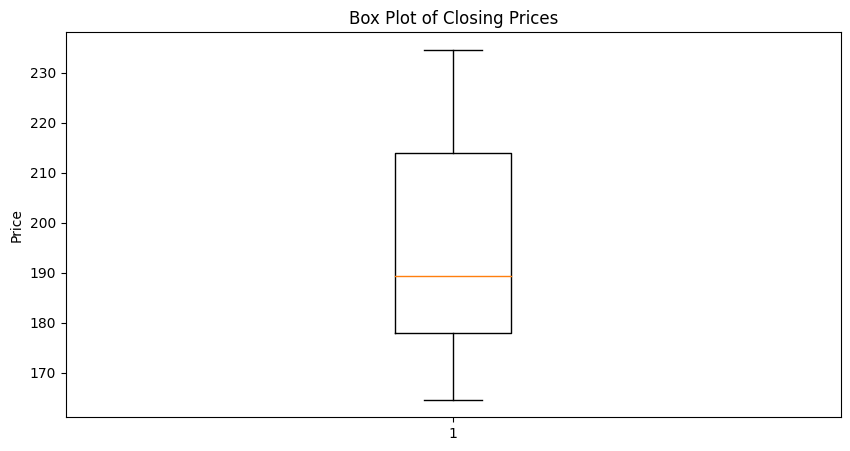

In [11]:
#Visualizing the outliers
plt.figure(figsize=(10, 5))
plt.boxplot(data['Close'])
plt.title('Box Plot of Closing Prices')
plt.ylabel('Price')
plt.show()

In [12]:
#Normalizing data using MinMaxScaler
scaler = MinMaxScaler()
data[['Open', 'High', 'Low', 'Close', 'Volume','Dividends']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume','Dividends']])


In [13]:
#Displaying the normalized data
data[['Open', 'High', 'Low', 'Close', 'Volume','Dividends']]

,Open,High,Low,Close,Volume,Dividends
Date,,,,,,
2023-10-02 00:00:00-04:00,0.075952,0.104689,0.092426,0.118341,0.095428,0.0
2023-10-03 00:00:00-04:00,0.090469,0.095297,0.090843,0.099143,0.086706,0.0
2023-10-04 00:00:00-04:00,0.074137,0.103428,0.093002,0.117061,0.098333,0.0
2023-10-05 00:00:00-04:00,0.111827,0.120810,0.117604,0.134837,0.083085,0.0
2023-10-06 00:00:00-04:00,0.111967,0.156416,0.124797,0.171526,0.112601,0.0
...,...,...,...,...,...,...
2024-09-24 00:00:00-04:00,0.893974,0.892837,0.897465,0.897395,0.066211,0.0
2024-09-25 00:00:00-04:00,0.841780,0.863812,0.872737,0.883101,0.061977,0.0
2024-09-26 00:00:00-04:00,0.875033,0.880860,0.892838,0.899539,0.042726,0.0


Moving Average: A moving average smooths out price data by creating a constantly updated average price. It helps identify trends over time.



In [14]:
#Creating moving averages
data['MA_30'] = data['Close'].rolling(window=30).mean()  # 30-day moving average
data['MA_50'] = data['Close'].rolling(window=50).mean()  # 50-day moving average

Volatility: Volatility is a measure of the price variation over a specific time period. It indicates how much the price fluctuates. A high volatility means the price changes significantly in a short period, which can indicate risk.

In [15]:
#Creating Volatility
data['Volatility'] = data['Close'].rolling(window=30).std()  # 30-day rolling standard deviation

In [16]:
#Creating financial ratio
eps = 5.00 # assuming earning per share to be 5.00
latest_close = data['Close'].iloc[-1]
data['P/E Ratio'] = latest_close / eps

In [17]:
#Calculating the dividend yield using the latest closing price
latest_dividend = data['Dividends'].iloc[-1]  # Assuming the last dividend
data['Dividend Yield'] = latest_dividend / latest_close

In [18]:
#Displaying the new dataframe
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Z-score,MA_30,MA_50,Volatility,P/E Ratio,Dividend Yield
Date,,,,,,,,,,,,,
2023-10-02 00:00:00-04:00,0.075952,0.104689,0.092426,0.118341,0.095428,0.0,0.0,-1.043464,NaN,NaN,NaN,0.195573,0.0
2023-10-03 00:00:00-04:00,0.090469,0.095297,0.090843,0.099143,0.086706,0.0,0.0,-1.110304,NaN,NaN,NaN,0.195573,0.0
2023-10-04 00:00:00-04:00,0.074137,0.103428,0.093002,0.117061,0.098333,0.0,0.0,-1.047919,NaN,NaN,NaN,0.195573,0.0
2023-10-05 00:00:00-04:00,0.111827,0.120810,0.117604,0.134837,0.083085,0.0,0.0,-0.986032,NaN,NaN,NaN,0.195573,0.0
2023-10-06 00:00:00-04:00,0.111967,0.156416,0.124797,0.171526,0.112601,0.0,0.0,-0.858294,NaN,NaN,NaN,0.195573,0.0


In [19]:
#checking for null values in updated data
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0
Z-score,0
MA_30,29
MA_50,49


In [20]:
#Dropping rows with NaN values from generated features
data.dropna(inplace=True)

In [21]:
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0
Z-score,0
MA_30,0
MA_50,0


In [22]:
#Applying columns to feature and target
X = data.drop('Close', axis = 1)
y = data['Close']

In [23]:
#Splitting the data into features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
#Training the model
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [25]:
#Making Predictins
rf_predictions = rf_model.predict(X_test)

In [26]:
#Calculating RMSE and MAE
rf_rmse = mean_squared_error(y_test, rf_predictions, squared = False)
rf_mae = mean_absolute_error(y_test, rf_predictions)

print(f"Mean Squared Error : {rf_rmse}")
print(f"Mean Absolute Error : {rf_mae}")

Mean Squared Error : 0.016116946765392957
Mean Absolute Error : 0.010359922310630397


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


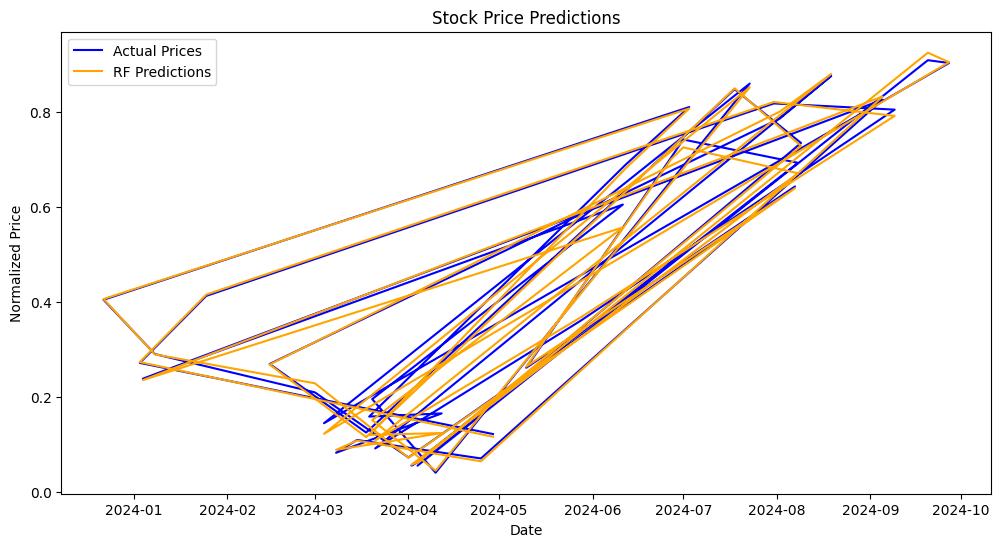

In [27]:
#Visualizing predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, rf_predictions, label='RF Predictions', color='orange')
plt.legend()
plt.title('Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.show()

In [28]:
from statsmodels.tsa.stattools import adfuller
close_prices = data['Close']

#Using Augmented Dickey-Fuller test to check if data is stationarity
result = adfuller(close_prices)
print(f'The ADF Statistic is: {result[0]}')
print(f'The p-value is: {result[1]}')

if result[1] > 0.05:
    print("The series is not stationary, applying differencing...")
    close_prices_diff = close_prices.diff().dropna()  #Applying first-order differencing
else:
    print("The series is stationary.")

The ADF Statistic is: -0.24607974134710278
The p-value is: 0.9328014834629942
The series is not stationary, applying differencing...


In [29]:
#Fitting the ARIMA model
model = ARIMA(close_prices_diff, order=(5, 1, 0))
model_fit = model.fit()

model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  201
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 337.288
Date:                Sun, 27 Oct 2024   AIC                           -662.576
Time:                        23:36:10   BIC                           -642.786
Sample:                             0   HQIC                          -654.567
                                - 201                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7127      0.070    -10.208      0.000      -0.850      -0.576
ar.L2         -0.5837      0.085     -6.897      0.000      -0.750      -0.418
ar.L3         -0.4925      0.092     -5.338      0.000      -0.673      -0.312
ar.L4         -0.2706      0.083     -3.265      0.001      -0.433      -0.108
ar.L5         -0.2096      0.065     -3.223      0.001      -0.337      -0.082
sigma2         0.0020      0.000     13.743      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                55.24
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               2.29   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
#Make predictions (daily and weekly)
daily_steps_ahead = 10
daily_predictions = model_fit.forecast(steps=daily_steps_ahead)
daily_future_dates = pd.date_range(start=close_prices.index[-1] + pd.Timedelta(days=1), periods=daily_steps_ahead)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [31]:
weekly_steps_ahead = 4
weekly_predictions = model_fit.forecast(steps=weekly_steps_ahead)
weekly_future_dates = pd.date_range(start=close_prices.index[-1] + pd.Timedelta(weeks=1), periods=weekly_steps_ahead, freq='W')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [32]:
#Preparing predictions
predicted_daily_prices = pd.Series(daily_predictions, index=daily_future_dates)
predicted_weekly_prices = pd.Series(weekly_predictions, index=weekly_future_dates)

In [33]:
#Combining historical and predicted data for plotting
combined_daily = pd.concat([close_prices, predicted_daily_prices])
combined_weekly = pd.concat([close_prices, predicted_weekly_prices])

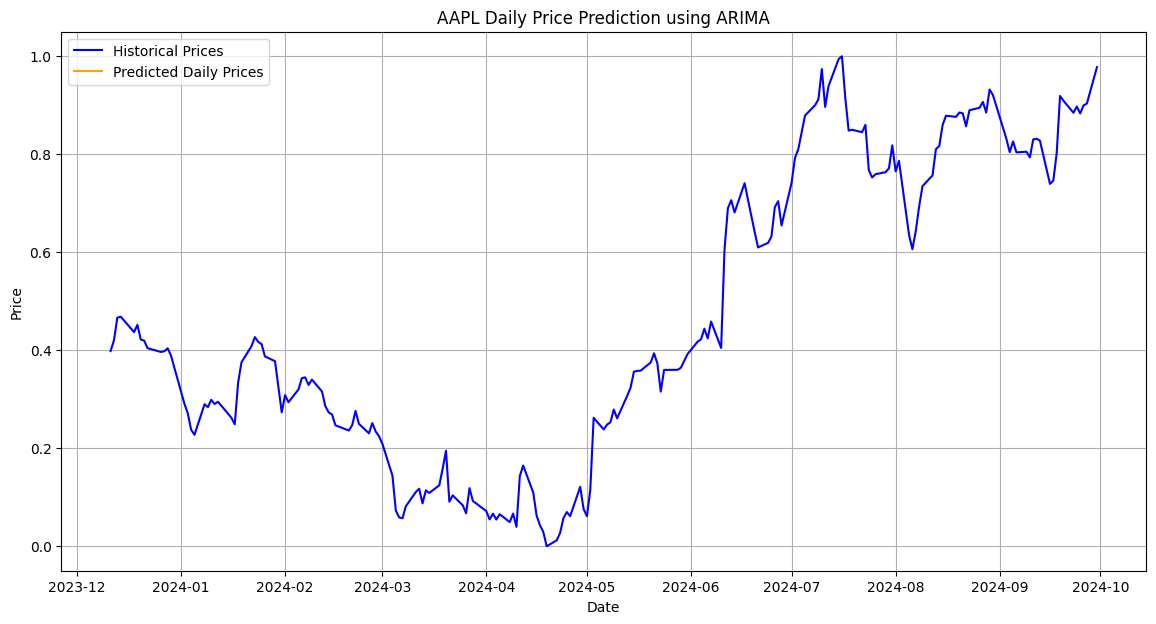

In [34]:
#Plotting daily predictions
plt.figure(figsize=(14, 7))
plt.plot(combined_daily.index, combined_daily, label='Historical Prices', color='blue')
plt.plot(predicted_daily_prices.index, predicted_daily_prices, label='Predicted Daily Prices', color='orange')
plt.title(f'{ticker} Daily Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

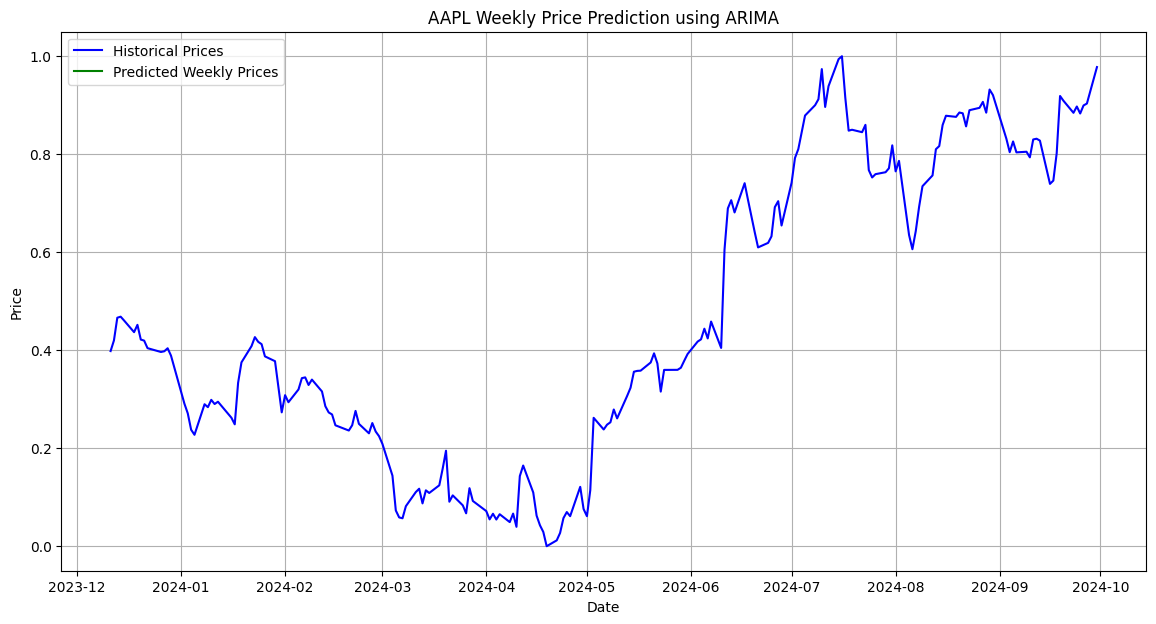

In [35]:
#Plotting weekly predictions
plt.figure(figsize=(14, 7))
plt.plot(combined_weekly.index, combined_weekly, label='Historical Prices', color='blue')
plt.plot(predicted_weekly_prices.index, predicted_weekly_prices, label='Predicted Weekly Prices', color='green')
plt.title(f'{ticker} Weekly Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# REPORT

**Introduction**

This report delves into the prediction of Apple's stock price using advanced machine learning techniques. A combination of technical indicators, fundamental analysis, and time series forecasting methods was employed to create a comprehensive predictive model.

**Data and Preprocessing**

Historical Apple stock price data was sourced from Yahoo Finance, encompassing a significant period. The data was pre-processed to handle missing values and outliers.

**Model Development**

Technical indicators like Moving Averages and volatality were incorporated as features. Fundamental ratios, such as P/E ratio, dividend yield, were considered.

**Results**

Both models provided valuable insights into Apple's future stock price. The Random Forest model, leveraging both technical and fundamental factors, demonstrated promising results, especially in capturing short-term price movements. The ARIMA model, on the other hand, excelled in long-term trend forecasting.

**Interpretation of the outcome(line chart)**

The predicted prices exhibit a general upward trend, with some fluctuations and potential periods of volatility. It's important to note that this is a probabilistic forecast, and actual prices may deviate from the predicted values.

Positive Outlook: The overall upward trend in the predicted prices suggests a positive outlook for Apple's stock in the coming months.

Potential Volatility: The model also indicates periods of increased volatility, which investors should be aware of.

Risk Management: While the model provides valuable insights, it's important to remember that stock market investments involve inherent risks. Diversification and careful risk management strategies are essential to mitigate potential losses.